#  Task-3 Predictive Modeling with Linear Regression

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Loading data

In [4]:
df=pd.read_csv('train.csv')

In [58]:
df2=pd.read_csv('test.csv')

In [5]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [59]:
df2.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


# Exploratory Data Analysis

In [9]:
df['x'].isnull().sum()

0

In [10]:
df['y'].isnull().sum()

1

In [11]:
df['y'].fillna(df['y'].median(),inplace=True)

In [16]:
df['y'].duplicated().sum()

1

In [17]:
df['x'].duplicated().sum()

598

<Axes: >

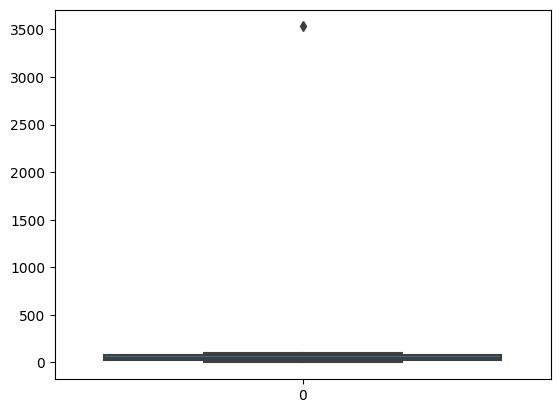

In [19]:
sns.boxplot(df['x'])

In [35]:
df.drop_duplicates(subset=['x'], inplace=True)

In [36]:
df['x'].value_counts().sum()

102

In [37]:
df['y'].value_counts().sum()

102

<Axes: >

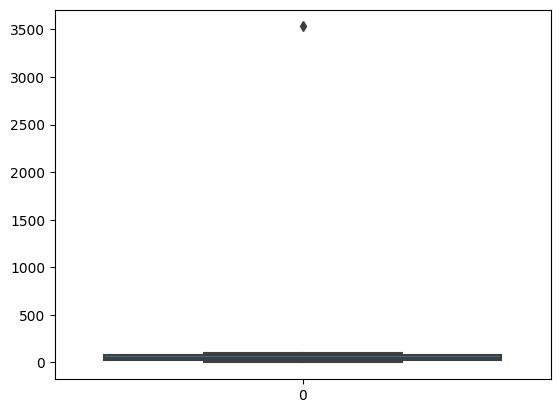

In [40]:
sns.boxplot(df['x'])

### Removing Outliers

In [43]:
z_score=zscore(df['x'])

In [44]:
column_name = 'x'
z_scores = zscore(df[column_name])
z_score_threshold = 3
median_value = df[column_name].median()
df[column_name][abs(z_scores) > z_score_threshold] = median_value    

<Axes: >

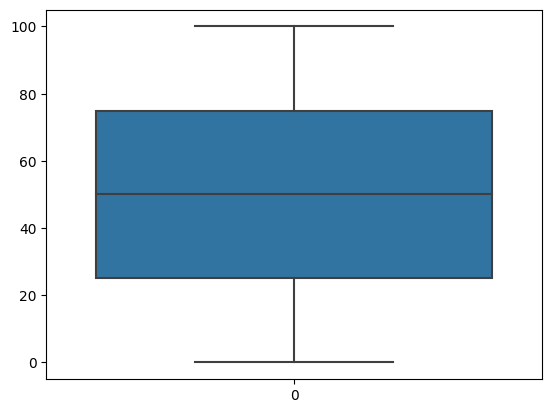

In [45]:
sns.boxplot(df['x'])

In [46]:
column_name = 'y'
z_scores = zscore(df[column_name])
z_score_threshold = 3
median_value = df[column_name].median()
df[column_name][abs(z_scores) > z_score_threshold] = median_value    

<Axes: >

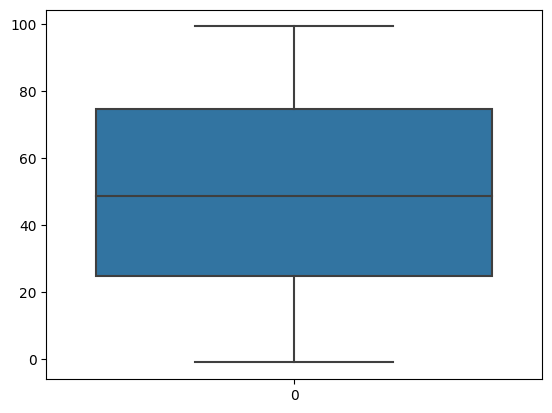

In [47]:
sns.boxplot(df['y'])

### Split into X and Y

In [64]:
X_train=df['x']
y_train=df['y']
X_train_reshaped = X_train.values.reshape(-1, 1)
Y_train_reshaped = y_train.values.reshape(-1, 1)

In [65]:
X_test=df['x']
y_test=df['y']
X_test_reshaped = X_test.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Model Selection

In [66]:
Model = LinearRegression()

In [70]:
Model.fit(X_train_reshaped,Y_train_reshaped);

# Model Evaluation

In [71]:
Model.score(X_test_reshaped,y_test_reshaped)

0.9893152664355229

In [74]:
y_pred = Model.predict(X_test_reshaped)

In [76]:
mse=mean_squared_error(y_test_reshaped, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.771584154137674


In [77]:
r2 = r2_score(y_test_reshaped, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9893152664355229


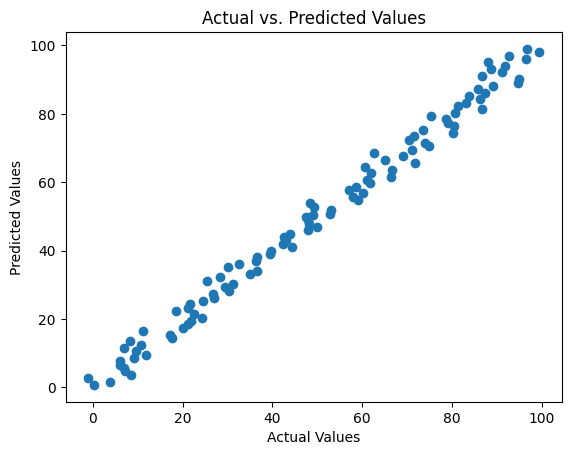

In [78]:
plt.scatter(y_test_reshaped, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()